### Normalization

Normalization is a technique ofte n applied as a paprt if data preparation for machine learning/ The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differemces in the range of values or loosing information.

There are many types of normalization. Some of them are:

<ul>
    <li>MinMax Scaling</li>
    <li>Mean normalization</li>
    <li>Max absolute scaling</li>
    <li>Robust scaling</li>
</ul>

#### MinMax scaling

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [3]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

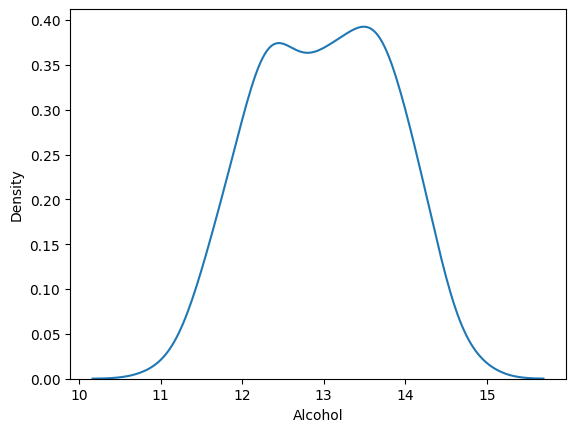

In [4]:
snb.kdeplot(data=df, x='Alcohol')

/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic acid', ylabel='Density'>

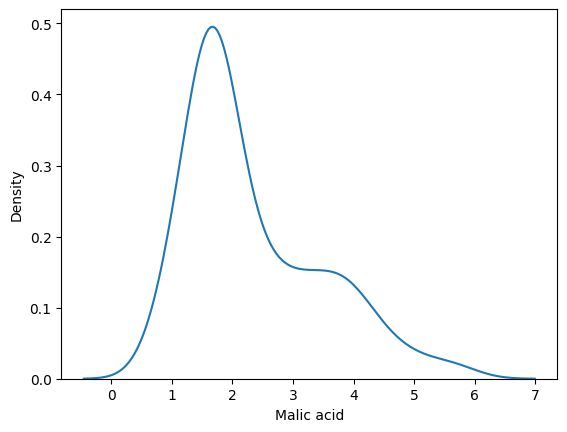

In [5]:
snb.kdeplot(data=df, x='Malic acid')

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

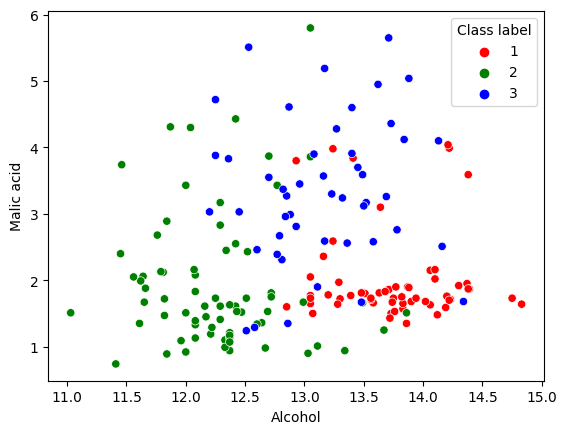

In [6]:
color_dict = {1:'red', 2:"green", 3:'blue'}
snb.scatterplot(data=df, x='Alcohol', y="Malic acid", hue="Class label", palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.3, random_state=0)

In [8]:
X_train

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51
...,...,...
103,11.82,1.72
67,12.37,1.17
117,12.42,1.61
47,13.90,1.68


In [9]:
y_train

22     1
108    2
175    3
145    3
71     2
      ..
103    2
67     2
117    2
47     1
172    3
Name: Class label, Length: 124, dtype: int64

Applying normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
scalar.fit(X_train)

MinMaxScaler()

In [11]:
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [12]:
X_train_scaled, X_test_scaled

(array([[0.72043011, 0.20378151],
        [0.31989247, 0.08403361],
        [0.60215054, 0.71218487],
        [0.57258065, 0.56302521],
        [0.76075269, 0.1302521 ],
        [0.48924731, 0.5       ],
        [0.75537634, 0.67857143],
        [0.61021505, 0.17436975],
        [0.54301075, 0.62394958],
        [0.39784946, 0.07352941],
        [0.33870968, 0.1092437 ],
        [0.46774194, 0.53361345],
        [0.5188172 , 0.53781513],
        [0.70967742, 0.07563025],
        [0.57258065, 0.30882353],
        [0.36021505, 0.0105042 ],
        [0.38709677, 0.13235294],
        [0.20967742, 0.25840336],
        [0.59408602, 0.64915966],
        [0.82526882, 0.26680672],
        [0.15591398, 0.09663866],
        [0.52688172, 0.16386555],
        [0.46774194, 0.31512605],
        [0.65860215, 0.16386555],
        [0.1155914 , 0.5987395 ],
        [0.27956989, 0.26680672],
        [0.21236559, 0.12184874],
        [0.65053763, 0.59033613],
        [0.31451613, 0.44957983],
        [0.543

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [14]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [15]:
np.round(X_train_scaled.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,0.53,0.31
std,0.22,0.24
min,0.00,0.00
25%,0.36,0.15
50%,0.54,0.21
75%,0.70,0.50
max,1.00,1.00


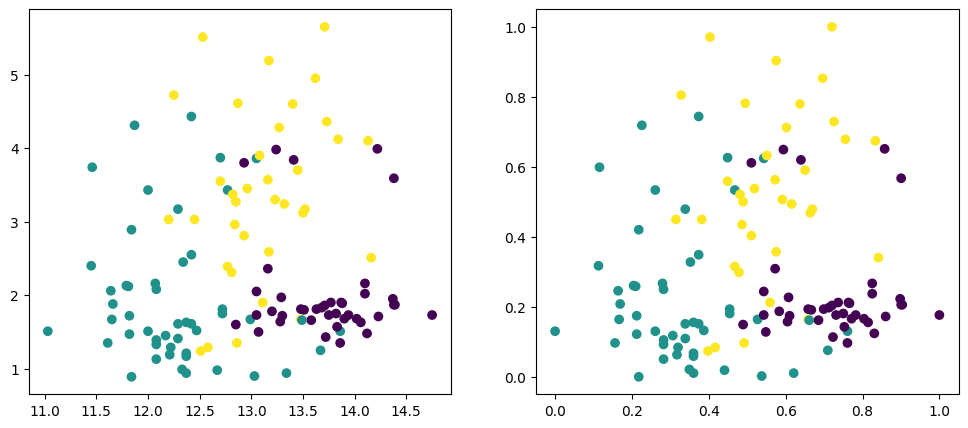

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(data=X_train, x="Alcohol", y="Malic acid", c= y_train)
ax1.set_label('Before normalization')

ax2.scatter(data=X_train_scaled, x="Alcohol", y="Malic acid", c = y_train)
ax2.set_label('After normalization')

plt.show()

/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/amrit/sda2/machine_learning/CampusX/simple_project/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/amrit/sda2/machine_learning/CampusX/simple_pr

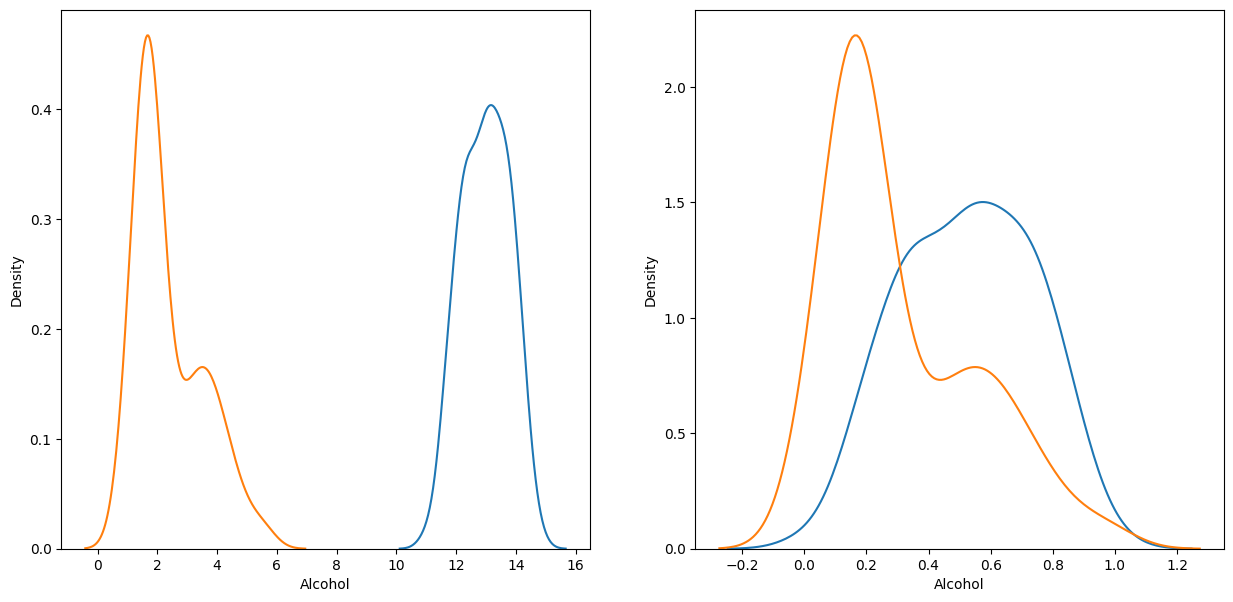

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(15,7))

ax1.set_label("Before scaling")
snb.kdeplot(data = X_train, x="Alcohol", ax=ax1)
snb.kdeplot(data = X_train, x="Malic acid", ax=ax1)


ax2.set_label("After scaling")
snb.kdeplot(data = X_train_scaled, x="Alcohol", ax=ax2)
snb.kdeplot(data = X_train_scaled, x="Malic acid", ax=ax2)
plt.show()